In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
print(confirmed_df.shape, deaths_df.shape, recovered_df.shape)

(264, 92) (264, 92) (250, 92)


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [6]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6


## **確診分佈圖**

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


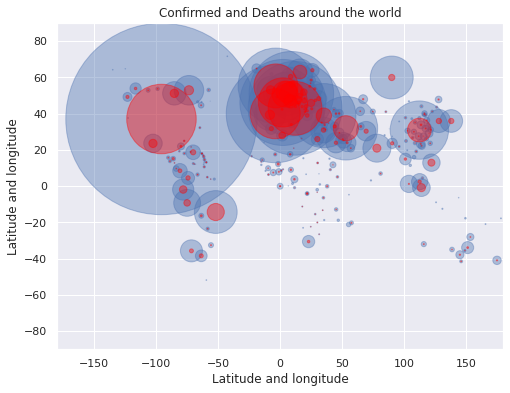

In [7]:
# plot COVID-19 confirmed instances on a earth map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

latest_day_confirmed = confirmed_df[confirmed_df.columns[-1]]
latest_day_deaths = deaths_df[deaths_df.columns[-1]]
latest_day_recovered = recovered_df[recovered_df.columns[-1]]

ax.scatter(confirmed_df.Long, confirmed_df.Lat, alpha = 0.4, s = latest_day_confirmed/20, label="confirmed")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

ax.scatter(deaths_df.Long, deaths_df.Lat, alpha = 0.4, s = latest_day_deaths/8, c = "red", label="deaths")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.title("Confirmed and Deaths around the world")
plt.show()

In [8]:
# 確診分佈
import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="50%", width="50%")
loc_li = list(zip((confirmed_df.Lat), (confirmed_df.Long)))[:30000] # <--- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

## **各國確診、死亡與康復人數**

### **確診**

In [9]:
# 全世界總確診人數
print("總確診人數: ", latest_day_confirmed.sum())
# 確診人數最多的前20國
top_twenty_confirmed = confirmed_df.groupby("Country/Region")[confirmed_df.columns[-1]].sum().sort_values(ascending=False)[:20]
top_twenty_confirmed

總確診人數:  2317758


Country/Region
US                732197
Spain             191726
Italy             175925
France            149149
Germany           143342
United Kingdom    115314
China              83787
Turkey             82329
Iran               80868
Belgium            37183
Russia             36793
Brazil             36658
Canada             34355
Netherlands        31766
Switzerland        27404
Portugal           19685
India              15722
Ireland            14758
Austria            14671
Peru               14420
Name: 4/18/20, dtype: int64

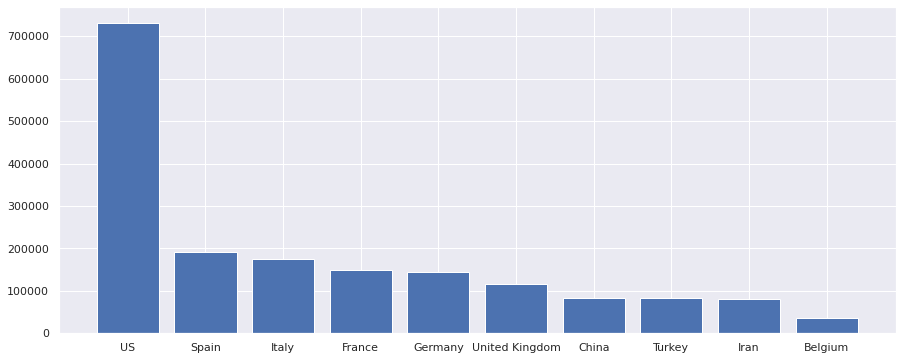

In [10]:
# 確診人數最多的前10國 bar chart
plt.figure(figsize=(15,6))
plt.bar(top_twenty_confirmed[:10].index, top_twenty_confirmed[:10].values)
plt.show()

### **死亡**

In [11]:
# 全世界總死亡人數
print("總死亡人數: ", latest_day_deaths.sum())
# 死亡人數最多的前10國
top_ten_deaths = deaths_df.groupby("Country/Region")[deaths_df.columns[-1]].sum().sort_values(ascending=False)[:10]
top_ten_deaths

總死亡人數:  159509


Country/Region
US                38664
Italy             23227
Spain             20043
France            19345
United Kingdom    15498
Belgium            5453
Iran               5031
China              4636
Germany            4459
Netherlands        3613
Name: 4/18/20, dtype: int64

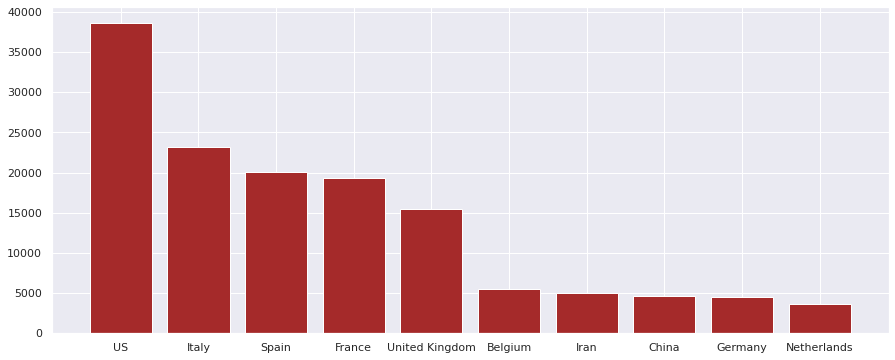

In [12]:
# 死亡人數最多的前10國 bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_ten_deaths.index, top_ten_deaths.values, color="brown")
plt.show()

### **康復**

In [13]:
# 全世界總康復人數
print("總康復人數: ", latest_day_recovered.sum())
# 康復人數最多的前10國
top_ten_recovered = recovered_df.groupby("Country/Region")[recovered_df.columns[-1]].sum().sort_values(ascending=False)[:10]
top_ten_recovered

總康復人數:  592319


Country/Region
Germany        85400
China          77614
Spain          74797
US             64840
Iran           55987
Italy          44927
France         36587
Switzerland    17100
Brazil         14026
Canada         10964
Name: 4/18/20, dtype: int64

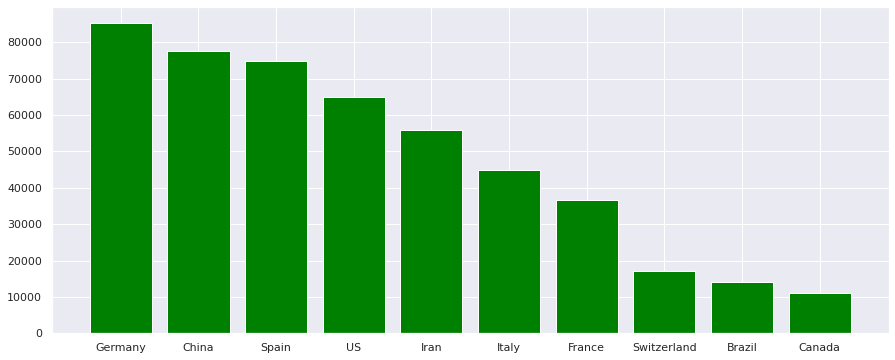

In [14]:
# 康復人數最多的前10國 bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_ten_recovered.index, top_ten_recovered.values, color="green")
plt.show()

## **全世界確診、死亡與康復人數**

### **總人數變化**

In [15]:
# 全世界確診總人數變化
accumulated_confirmed = confirmed_df.iloc[:, 4:].apply(lambda x: x.sum(), axis=0)
# 全世界死亡總人數變化
accumulated_deaths = deaths_df.iloc[:, 4:].apply(lambda x: x.sum(), axis=0)
# 全世界康復總人數變化
accumulated_recovered = recovered_df.iloc[:, 4:].apply(lambda x: x.sum(), axis=0)

# 建立 DataFrame
df_world_accumulated = pd.DataFrame({"acc_confirmed": accumulated_confirmed, "acc_deaths": accumulated_deaths, "acc_recovered": accumulated_recovered})
df_world_accumulated

,acc_confirmed,acc_deaths,acc_recovered
1/22/20,555,17,28
1/23/20,654,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52
...,...,...,...
4/14/20,1976191,125983,474261
4/15/20,2056054,134176,511019
4/16/20,2152646,143800,542107
4/17/20,2240190,153821,568343


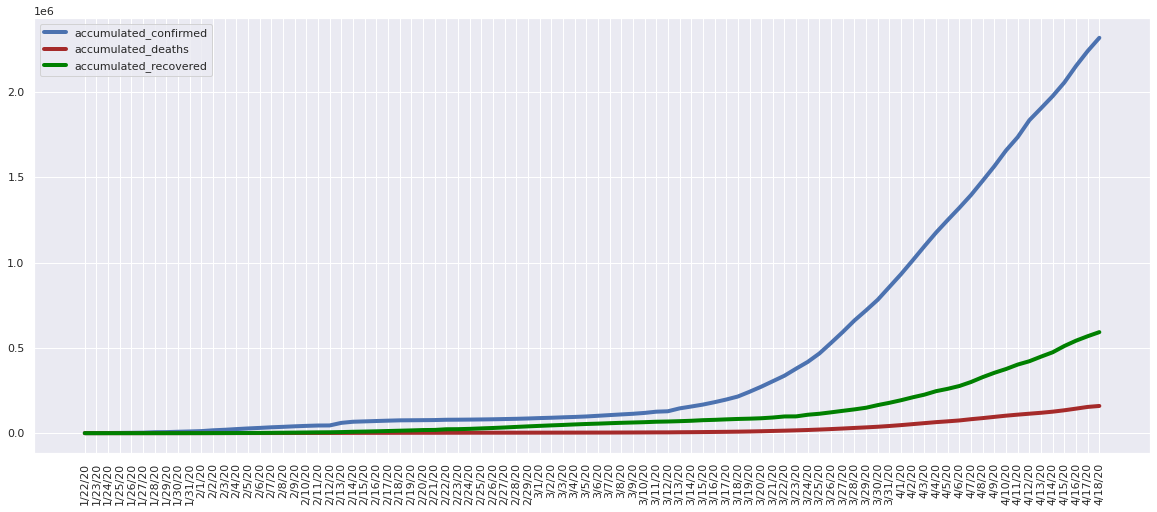

In [16]:
# 全世界確診、死亡與康復總人數變化
plt.figure(figsize=(20,8))
plt.plot(accumulated_confirmed, label="accumulated_confirmed", lw=4)
plt.plot(accumulated_deaths, label="accumulated_deaths", c="brown", lw=4)
plt.plot(accumulated_recovered, label="accumulated_recovered", c="green", lw=4)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### **單日新增人數變化**

In [17]:
# 單日新增確診、死亡與康復人數變化
single_day_confirmed = [accumulated_confirmed[0]]
single_day_deaths = [accumulated_deaths[0]]
single_day_recovered = [accumulated_recovered[0]]
for i, (c, d, r) in enumerate(zip(accumulated_confirmed, accumulated_deaths, accumulated_recovered)):
    if i != 0:
        single_day_confirmed.append(c - accumulated_confirmed[i-1])
        single_day_deaths.append(d - accumulated_deaths[i-1])
        single_day_recovered.append(r - accumulated_recovered[i-1])
df_single_day = pd.DataFrame(data={"confirmed_num": single_day_confirmed, "deaths_num": single_day_deaths, "recovered_num": single_day_recovered}, index=accumulated_confirmed.index)
df_single_day

,confirmed_num,deaths_num,recovered_num
1/22/20,555,17,28
1/23/20,99,1,2
1/24/20,287,8,6
1/25/20,493,16,3
1/26/20,684,14,13
...,...,...,...
4/14/20,71353,6502,25606
4/15/20,79863,8193,36758
4/16/20,96592,9624,31088
4/17/20,87544,10021,26236


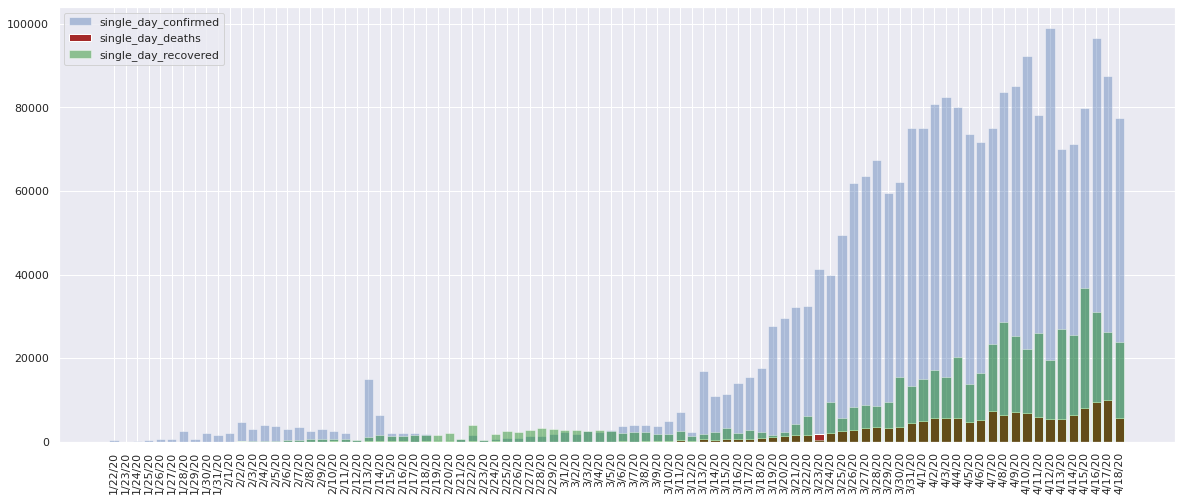

In [18]:
# 單日新增確診、死亡與康復人數變化 bar chart
plt.figure(figsize=(20,8))
plt.bar(df_single_day.index, df_single_day["confirmed_num"], label="single_day_confirmed", alpha=0.4)
plt.bar(df_single_day.index, df_single_day["deaths_num"], color="brown", label="single_day_deaths", alpha=1)
plt.bar(df_single_day.index, df_single_day["recovered_num"], color="green", label="single_day_recovered", alpha=0.4)
plt.xticks(rotation=90)
plt.legend()
plt.show()

## **台灣累計確診與康復**

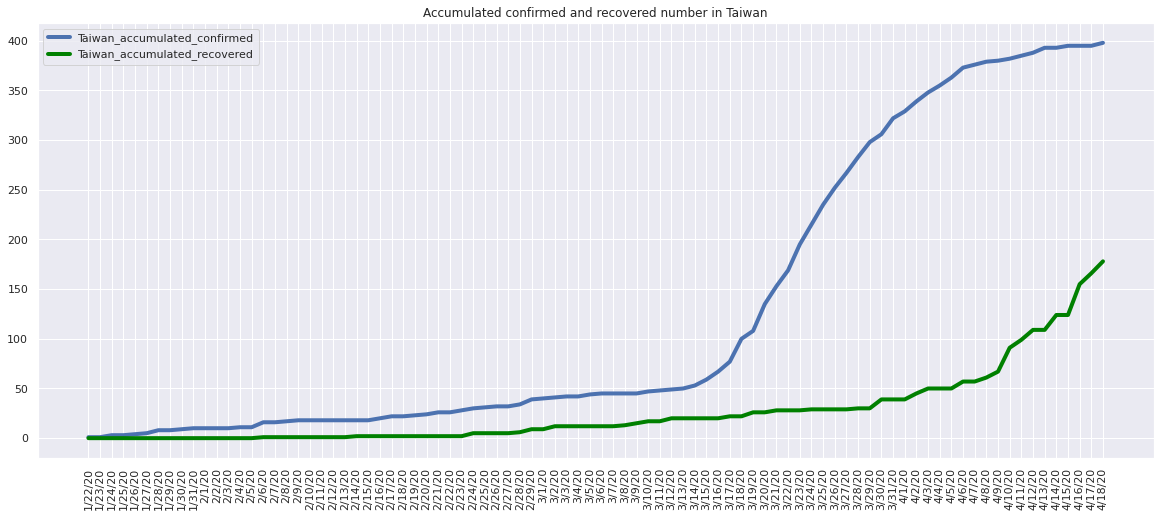

In [19]:
# 台灣確診與康復人數變化
df_confirmed_taiwan = confirmed_df[confirmed_df["Country/Region"] == "Taiwan*"]
df_recovered_taiwan = recovered_df[recovered_df["Country/Region"] == "Taiwan*"]
plt.figure(figsize=(20,8))
plt.plot(df_confirmed_taiwan.columns[4:], df_confirmed_taiwan.iloc[0,4:], label="Taiwan_accumulated_confirmed", lw=4)
plt.plot(df_recovered_taiwan.columns[4:], df_recovered_taiwan.iloc[0,4:], color="green", label="Taiwan_accumulated_recovered", lw=4)
plt.xticks(rotation=90)
plt.legend()
plt.title("Accumulated confirmed and recovered number in Taiwan")
plt.show()

## **探討緯度與確診人數的關係 (Simple Linear Regression)**

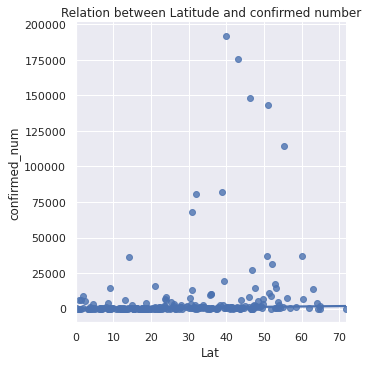

In [20]:
# 找確診人數在30萬人以下的國家，排除 outlier
predict_df = confirmed_df[["Lat", confirmed_df.columns[-1]]]
predict_df.columns = ["Lat", "confirmed_num"]
predict_df= predict_df.apply(lambda x: x.abs(), axis=0)
obs = predict_df[predict_df["confirmed_num"] < 3e5]
sns.lmplot(x="Lat", y="confirmed_num", data=obs, robust=True, ci=None)
plt.title("Relation between Latitude and confirmed number")
plt.show()

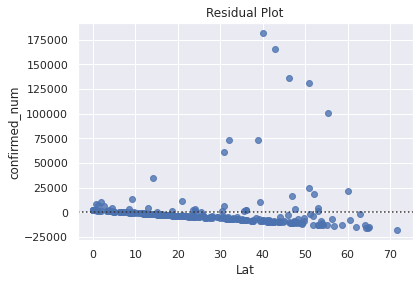

In [21]:
# Residual plot
sns.residplot(x="Lat", y="confirmed_num", data=obs)
plt.title("Residual Plot")
plt.show()

In [22]:
# 建立 Linear Regression Model
from sklearn.linear_model import LinearRegression
x_train = obs.drop(["confirmed_num"], axis=1)
y_train = obs["confirmed_num"]
model = LinearRegression()
model.fit(x_train, y_train)
print("Intercept is ", model.intercept_)
print("coefficients  is ", model.coef_[0])
print("Confirmed_num = ", end="")
print(model.intercept_, "+ ", end="")
print(model.coef_[0], "* Latitude")

Intercept is  -1922.9543298827675
coefficients  is  285.15212374529204
Confirmed_num = -1922.9543298827675 + 285.15212374529204 * Latitude


<h3> 
<b> Confirmed_num = -1922.95 + 285.15 * Latitude </b>

 此模型表示緯度每增加一度，平均確診人數就會增加大約 285 人 <br>
 但殘差分佈仍非隨機（ 存在 pattern ），因此需要納入更多變數，才能使預測更準確！
</h3>
